In [2]:
from data_search_engine import run_app

In [4]:
run_app()

In [217]:
import yfinance as yf

#!pip install plotly
import plotly.graph_objects as go

import matplotlib.pyplot as plt

#!pip install seaborn 
import seaborn as sns

#!pip install pandas_datareader
import pandas_datareader.data as web
import pandas as pd

import datetime as datetime

import plotly.express as px
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error

[*********************100%***********************]  1 of 1 completed

pobieranie


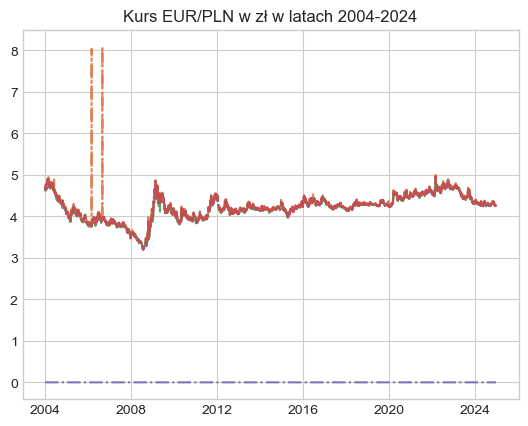

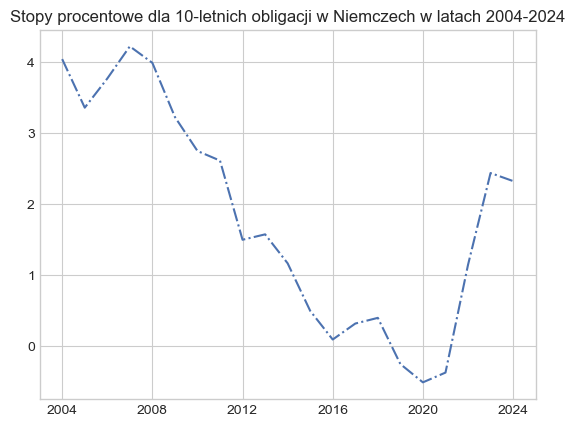

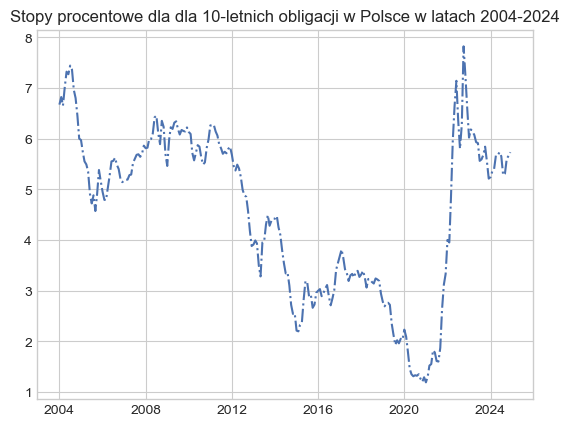

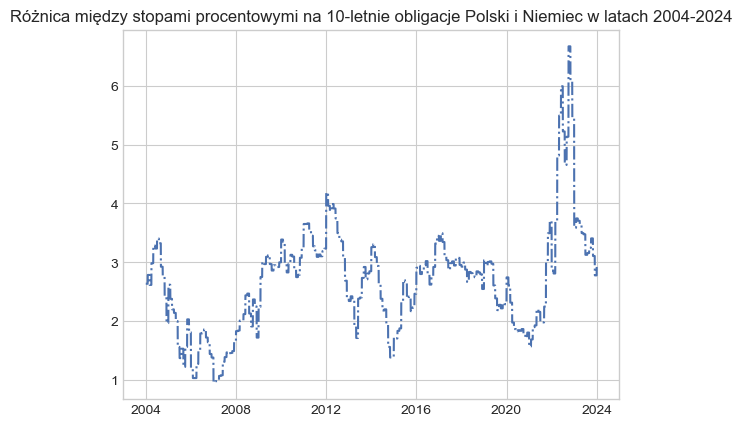

Odchylenie standardowe
EURPLN=X           0.289337
Germany            1.580179
Poland             1.628323
Rate_Difference    0.905075
dtype: float64
współczynnik zmienności
EURPLN=X           0.068542
Germany            0.880260
Poland             0.360932
Rate_Difference    0.338899
dtype: float64
Korelacja Pearsona
                 EURPLN=X   Germany    Poland  Rate_Difference
EURPLN=X         1.000000 -0.010673 -0.002935         0.011838
Germany         -0.010673  1.000000  0.126210        -0.168434
Poland          -0.002935  0.126210  1.000000         0.771308
Rate_Difference  0.011838 -0.168434  0.771308         1.000000
Korelacja Spearmana
                 EURPLN=X   Germany    Poland  Rate_Difference
EURPLN=X         1.000000  0.010480  0.004071         0.000407
Germany          0.010480  1.000000  0.146322        -0.146448
Poland           0.004071  0.146322  1.000000         0.923374
Rate_Difference  0.000407 -0.146448  0.923374         1.000000


In [249]:
start=datetime.datetime(2004, 1, 1)
end=datetime.datetime(2024, 12, 31)

eurpln = 'EURPLN=X'
intrde = web.DataReader('IRLTLT01DEA156N', 'fred', start, end)
intrpl = web.DataReader('IRLTLT01PLM156N', 'fred', start, end)

eurpln
intrde
intrpl

print(f"pobieranie")

df = yf.download(eurpln, start=start, end=end)
#df = df.resample('YE').mean()

dfa = intrde

dfb = intrpl

dfa=dfa.dropna()
dfb=dfb.dropna()

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")

dfa.columns = ['Germany']
dfb.columns = ['Poland']

dfa_daily = dfa.asfreq('D', method='ffill')
dfb_daily = dfb.asfreq('D', method='ffill')

aligned_data = pd.concat([dfa_daily, dfb_daily], axis=1).dropna()
rozplde = aligned_data['Poland'] - aligned_data['Germany']
rozplde = pd.DataFrame(rozplde, columns=['Rate_Difference'])

plt.plot(df, '-.')
plt.xlabel("")
plt.ylabel("")
plt.title("Kurs EUR/PLN w zł w latach 2004-2024")
plt.grid(True)
plt.show()

plt.plot(dfa, '-.')
plt.xlabel("")
plt.ylabel("")
plt.title("Stopy procentowe dla 10-letnich obligacji w Niemczech w latach 2004-2024")
plt.grid(True)
plt.show()

plt.plot(dfb, '-.')
plt.xlabel("")
plt.ylabel("")
plt.title("Stopy procentowe dla dla 10-letnich obligacji w Polsce w latach 2004-2024")
plt.grid(True)
plt.show()

plt.plot(rozplde, '-.')
plt.xlabel("")
plt.ylabel("")
plt.title("Różnica między stopami procentowymi na 10-letnie obligacje Polski i Niemiec w latach 2004-2024")
plt.grid(True)
plt.show()




kumultab=pd.concat([
    df['Close'],
    dfa_daily,
    dfb_daily,
    rozplde
], axis=1)

kumultab


print('Odchylenie standardowe')
odchst = kumultab.std()
print(odchst)

print('współczynnik zmienności')
zmiennosc = kumultab.std()/kumultab.mean()
print(zmiennosc)

kumultab_log = np.log(kumultab/kumultab.shift(1)).dropna()


korelacjap = kumultab_log.corr(method='pearson')
print("Korelacja Pearsona")
print(korelacjap)

korelacja = kumultab_log.corr(method='spearman')
print("Korelacja Spearmana")
print(korelacja)








